# EEG Data Analysis: ADHD vs Control
This notebook includes:
- Time-series line plots for one ADHD and one Control patient
- Histogram of unique patient counts by class
- Mean channel value comparison by class
- Boxplots per channel
- Correlation heatmaps
- t-SNE visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('../../data/adhdata.csv')
channels = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2',
            'F7','F8','T7','T8','P7','P8','Fz','Cz','Pz']

FileNotFoundError: [Errno 2] No such file or directory: '../../data/data.csv'

## Unique Patient Counts by Class

C:\Users\Tenodese\AppData\Local\Temp\ipykernel_15500\1297420570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=patient_counts.index, y=patient_counts.values, palette='Set2')


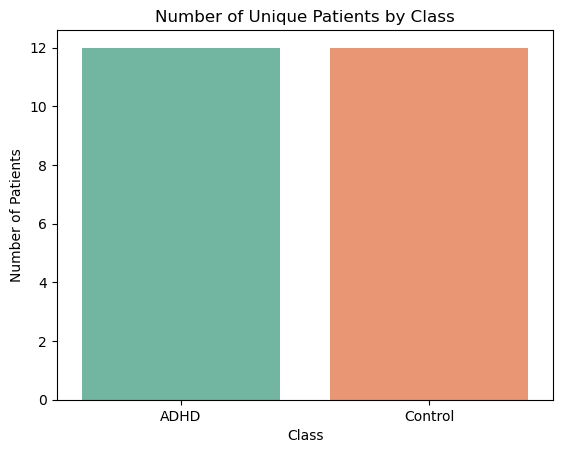

In [ ]:
patient_counts = df.groupby('Class')['ID'].nunique()
sns.barplot(x=patient_counts.index, y=patient_counts.values, palette='Set2')
plt.title("Number of Unique Patients by Class")
plt.ylabel("Number of Patients")
plt.xlabel("Class")
plt.show()

## Time-Series Plot for One ADHD and One Control Patient

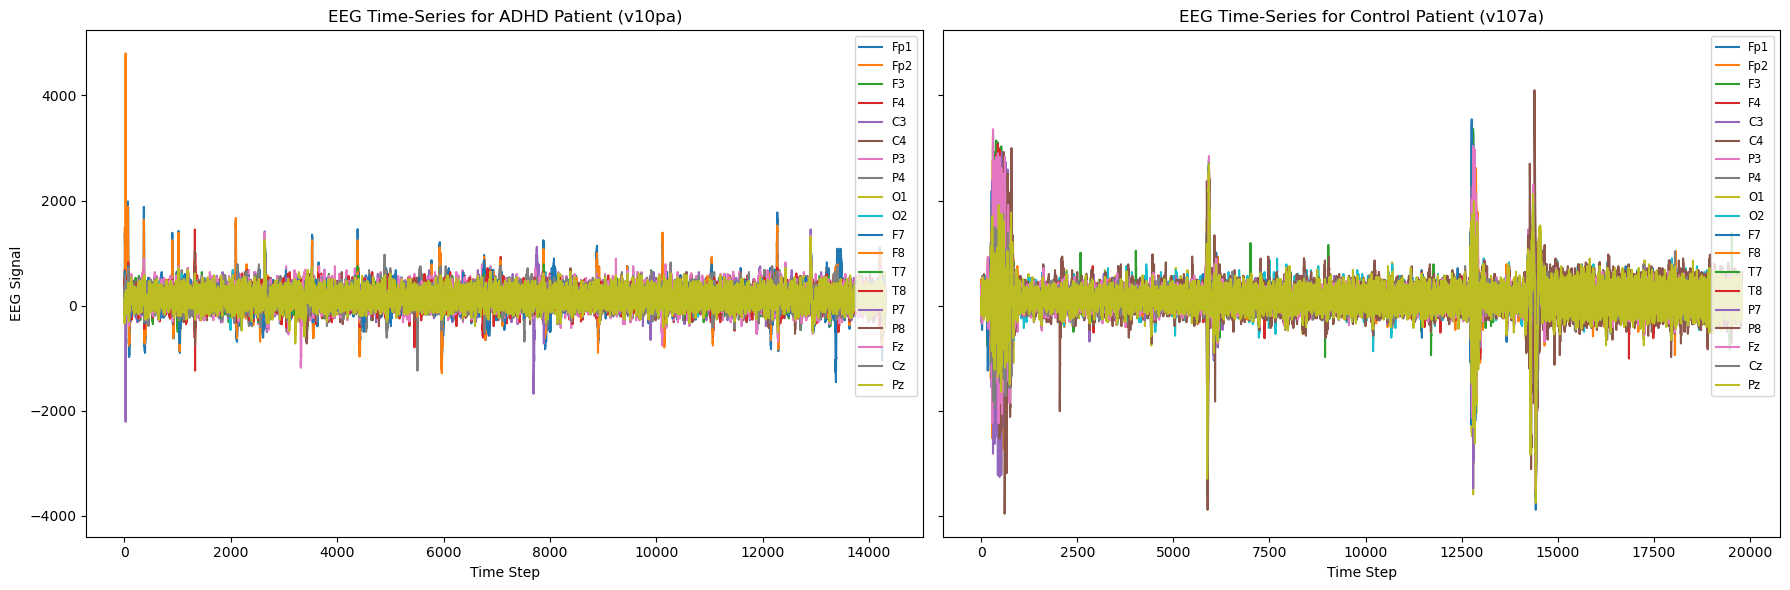

In [ ]:
# Select one ADHD and one Control patient
adhd_id = df[df['Class'] == 'ADHD']['ID'].iloc[0]
control_id = df[df['Class'] == 'Control']['ID'].iloc[0]

adhd_df = df[df['ID'] == adhd_id].reset_index(drop=True)
control_df = df[df['ID'] == control_id].reset_index(drop=True)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
for ch in channels:
    axs[0].plot(adhd_df.index, adhd_df[ch], label=ch)
    axs[1].plot(control_df.index, control_df[ch], label=ch)

axs[0].set_title(f"EEG Time-Series for ADHD Patient ({adhd_id})")
axs[1].set_title(f"EEG Time-Series for Control Patient ({control_id})")
axs[0].set_xlabel("Time Step")
axs[1].set_xlabel("Time Step")
axs[0].set_ylabel("EEG Signal")
axs[0].legend(loc='upper right', fontsize='small')
axs[1].legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()

## Mean EEG Values per Channel (Per Patient Average)

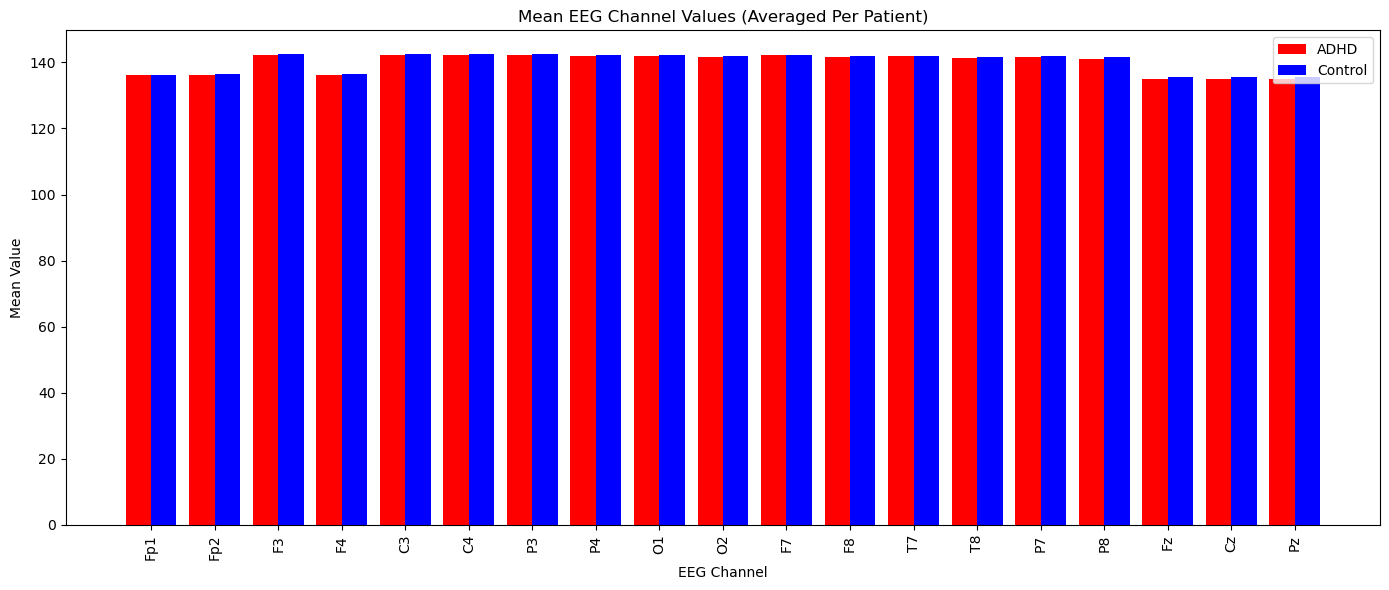

In [ ]:
per_patient_avg = df.groupby(['ID', 'Class'])[channels].mean().reset_index()
adhd_means = per_patient_avg[per_patient_avg['Class'] == 'ADHD'][channels].mean()
control_means = per_patient_avg[per_patient_avg['Class'] == 'Control'][channels].mean()

x = np.arange(len(channels))
plt.figure(figsize=(14, 6))
plt.bar(x - 0.2, adhd_means, width=0.4, label='ADHD', color='red')
plt.bar(x + 0.2, control_means, width=0.4, label='Control', color='blue')
plt.xticks(x, channels, rotation=90)
plt.title("Mean EEG Channel Values (Averaged Per Patient)")
plt.xlabel("EEG Channel")
plt.ylabel("Mean Value")
plt.legend()
plt.tight_layout()
plt.show()

## Boxplots of EEG Channels by Class

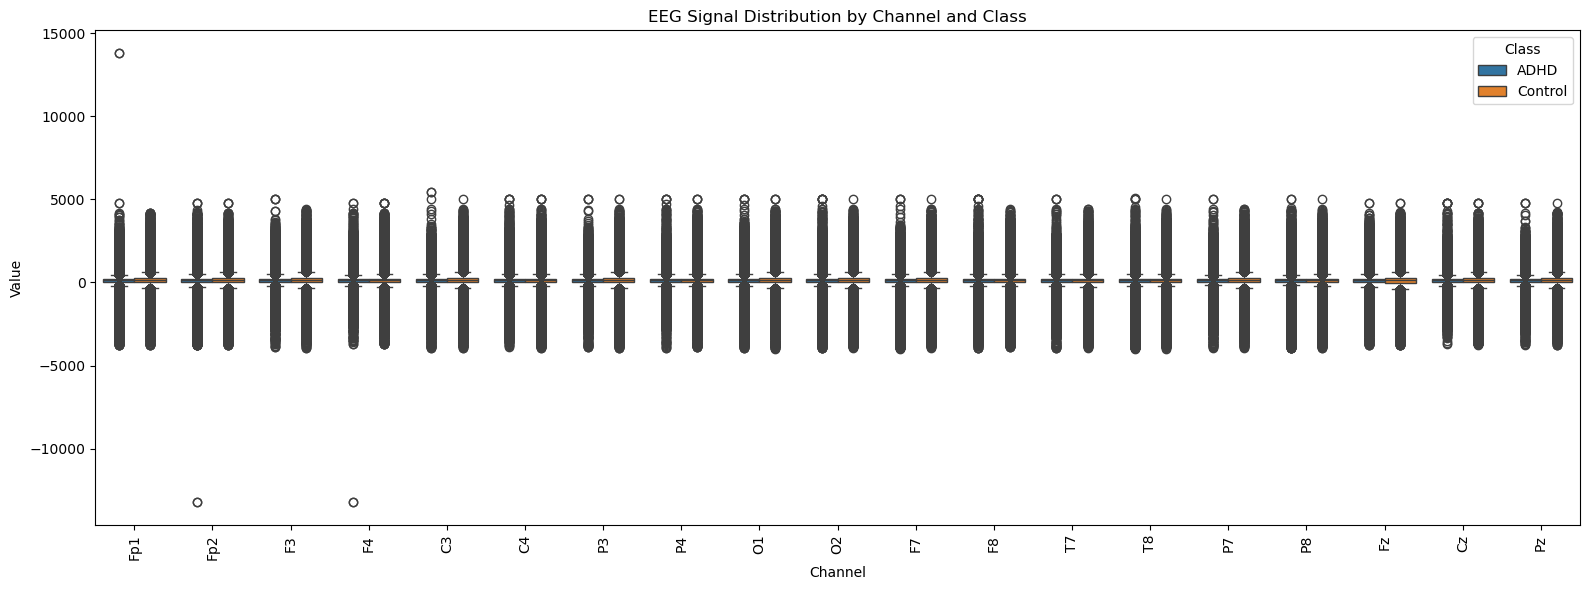

In [ ]:
melted_df = df.melt(id_vars=['Class'], value_vars=channels, 
                    var_name='Channel', value_name='Value')
plt.figure(figsize=(16, 6))
sns.boxplot(data=melted_df, x='Channel', y='Value', hue='Class')
plt.title("EEG Signal Distribution by Channel and Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Correlation Heatmaps per Class

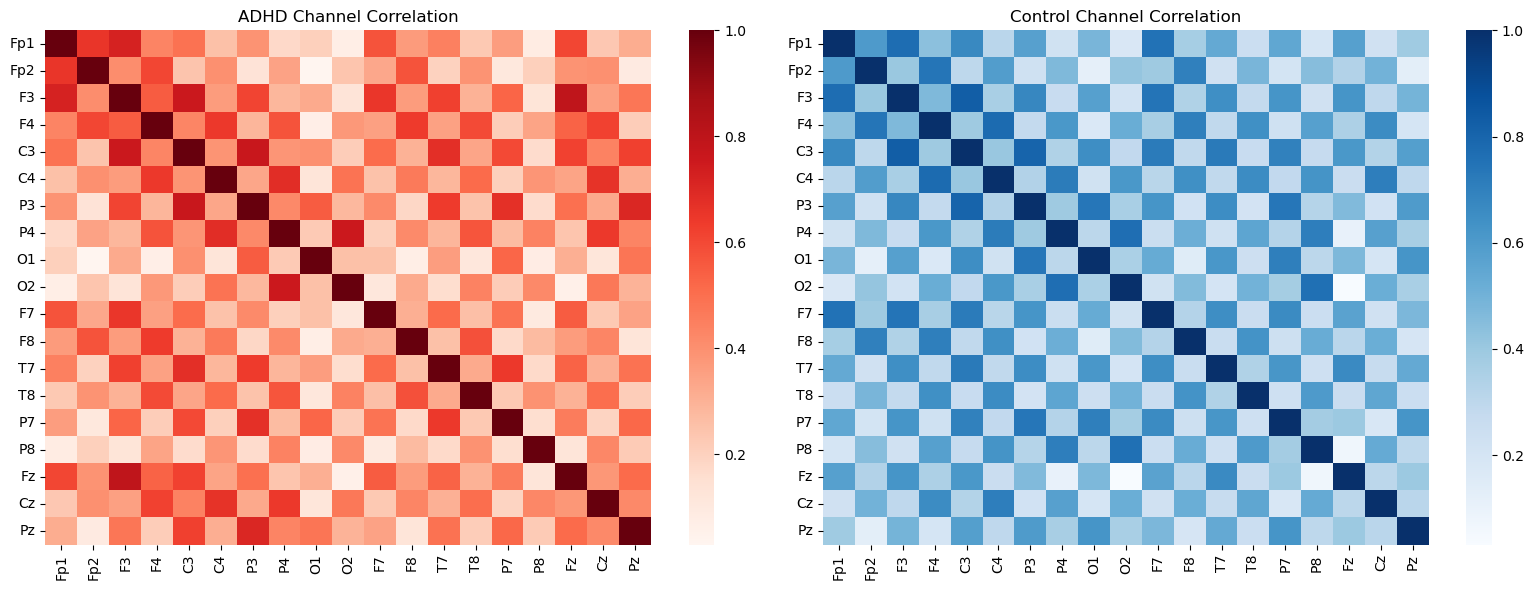

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(df[df['Class'] == 'ADHD'][channels].corr(), ax=axs[0], cmap='Reds', annot=False)
axs[0].set_title("ADHD Channel Correlation")
sns.heatmap(df[df['Class'] == 'Control'][channels].corr(), ax=axs[1], cmap='Blues', annot=False)
axs[1].set_title("Control Channel Correlation")
plt.tight_layout()
plt.show()

## t-SNE Visualization

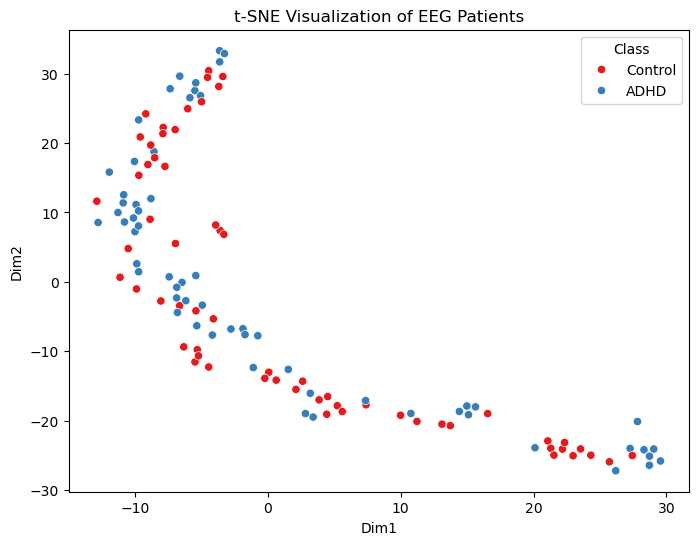

In [ ]:
X = per_patient_avg[channels].values
y = per_patient_avg['Class'].values
X_scaled = StandardScaler().fit_transform(X)
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_embedded, columns=['Dim1', 'Dim2'])
tsne_df['Class'] = y
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='Class', palette='Set1')
plt.title("t-SNE Visualization of EEG Patients")
plt.show()